In [1]:
using QuadGK
using Plots

# First for the Interval $[-1, 1]$

In [2]:
function CreatePolynomial(n)
    Cn = C(n)
    Bn = B(n)
    
    function pn(x)
        out = 0
        for m in 0:n
            out += Bn[m+1] * ((x-1) / 2)^m
        end
        return Cn * out * (1-x^2)
    end
    return pn
end

function C(n)
    return sqrt((2n+5) / (32 * prod(n+1:n+4)))
end

function B(n)
    out = Array{Int64}(undef, n+1)
    for m in 0:n
        out[m+1] = prod(m+3:n+m+4) / (factorial(m) * factorial(n - m))
    end
    return out
end

V = [CreatePolynomial(n) for n in 0:3]
X = -1:0.01:1

p = plot()
for (i, vi) in enumerate(V)
    plot!(X, vi.(X), lw=1.5, grid=false, label="\$n=$i\$", legend=:bottomright)
end
plot!(xlims=(-1, 1))


# Check orthonormality
i = 0 
for vi in V
    j = 0
    for vj in V
        innerprod = quadgk(x -> vi(x) * vj(x), -1, 1, order=7)
        println("i, j ", (i, j),": ", round(innerprod[1], digits=7))
        j += 1
    end
    i += 1
end

i, j (0, 0): 1.0
i, j (0, 1): 0.0
i, j (0, 2): 0.0
i, j (0, 3): 0.0
i, j (1, 0): 0.0
i, j (1, 1): 1.0
i, j (1, 2): 0.0
i, j (1, 3): 0.0
i, j (2, 0): 0.0
i, j (2, 1): 0.0
i, j (2, 2): 1.0
i, j (2, 3): -0.0
i, j (3, 0): 0.0
i, j (3, 1): 0.0
i, j (3, 2): -0.0
i, j (3, 3): 1.0


## Alternative Coeff Definitions for Improved Stability 

In [2]:
using SpecialFunctions: gamma

In [4]:
function norm_const(n)
    return 2^5 * gamma(n + 3)^2 / ((2n+5) * gamma(n+5)*factorial(big(n)))
end

function jacobi_coeff(n)
    return [gamma(n+3) * binomial(n, m) * gamma(n+m+5) / (factorial(big(n)) * gamma(n+5) * gamma(m+3)) for m in 0:n]
end

norm_const (generic function with 1 method)

In [2]:
function C(n)
    return sqrt((2n+5) / (32 * prod(n+1:n+4)))
end

function B(n)
    out = Array{Int64}(undef, n+1)
    for m in 0:n
        out[m+1] = prod(m+3:n+m+4) / (factorial(m) * factorial(n - m))
    end
    return out
end

function CreatePolynomial(n)
    Cn = C(n)
    Bn = B(n)
    
    function pn(x)
        out = 0
        for m in 0:n
            out += Bn[m+1] * ((x-1) / 2)^m
        end
        return Cn * out * (1-x^2)
    end
    return pn
end


V = [CreatePolynomial(n) for n in 0:3]
X = -1:0.01:1

p = plot()
for (i, vi) in enumerate(V)
    plot!(X, vi.(X), lw=1.5, grid=false, label="\$n=$i\$", legend=:bottomright)
end
plot!(xlims=(-1, 1))


# Check orthonormality
i = 0 
for vi in V
    j = 0
    for vj in V
        innerprod = quadgk(x -> vi(x) * vj(x), -1, 1, order=7)
        println("i, j ", (i, j),": ", round(innerprod[1], digits=7))
        j += 1
    end
    i += 1
end

i, j (0, 0): 1.0
i, j (0, 1): 0.0
i, j (0, 2): 0.0
i, j (0, 3): 0.0
i, j (1, 0): 0.0
i, j (1, 1): 1.0
i, j (1, 2): 0.0
i, j (1, 3): 0.0
i, j (2, 0): 0.0
i, j (2, 1): 0.0
i, j (2, 2): 1.0
i, j (2, 3): -0.0
i, j (3, 0): 0.0
i, j (3, 1): 0.0
i, j (3, 2): -0.0
i, j (3, 3): 1.0


## Now for $[0, 1]$

In [18]:
function CreatePolynomial(n)
    Cn = C(n)
    Bn = B(big(n))
    
    function pn(x)
        out = 0
        for m in 0:n
            out += Bn[m+1] * (x-1)^m
        end
        return  Cn * out * x * (1-x)
    end
    return pn
end

function C(n)
    return sqrt((2n+5) / (prod(n+1:n+4)))
end

function B(n)
    out = Array{Float64}(undef, n+1)
    for m in 0:n
        out[m+1] = prod(m+3:n+m+4) / (factorial(m) * factorial(n - m))
    end
    return out
end

V = [CreatePolynomial(n) for n in 0:3]
X = -1:0.01:1

p = plot()
for (i, vi) in enumerate(V)
    plot!(X, vi.(X), lw=1.5, grid=false, label="\$n=$i\$", legend=:bottomright)
end
plot!(xlims=(-1, 1))


# Check orthonormality
i = 0 
for vi in V
    j = 0
    for vj in V
        innerprod = quadgk(x -> vi(x) * vj(x), 0, 1, order=7)
        println("i, j ", (i, j),": ", round(innerprod[1], digits=7))
        j += 1
    end
    i += 1
end

i, j (0, 0): 1.0
i, j (0, 1): 0.0
i, j (0, 2): 0.0
i, j (0, 3): 0.0
i, j (1, 0): 0.0
i, j (1, 1): 1.0
i, j (1, 2): 0.0
i, j (1, 3): 0.0
i, j (2, 0): 0.0
i, j (2, 1): 0.0
i, j (2, 2): 1.0
i, j (2, 3): -0.0
i, j (3, 0): 0.0
i, j (3, 1): 0.0
i, j (3, 2): -0.0
i, j (3, 3): 1.0


In [14]:
function C(n)
    return sqrt((2n+5) / (prod(n+1:n+4)))
end

function B(n)
    out = Array{Float64}(undef, n+1)
    for m in 0:n
        out[m+1] = prod(m+3:n+m+4) / (factorial(m) * factorial(n - m))
    end
    return out
end



for n in 0:20
    println("n=$n : $(maximum(C(n)*B(big(n))))")
end

n=0 : 5.477225575051661
n=1 : 28.982753492378876
n=2 : 132.81566172707193
n=3 : 865.1242685302499
n=4 : 4876.859645304548
n=5 : 25379.98226949735
n=6 : 146502.08674281742
n=7 : 847211.8571408216
n=8 : 4.636170847533555e6
n=9 : 2.5567933449434664e7
n=10 : 1.501918741610211e8
n=11 : 8.454142371946135e8
n=12 : 4.598681815748378e9
n=13 : 2.7025627202474255e10
n=14 : 1.549245414827367e11
n=15 : 8.624805617964043e11
n=16 : 4.917595908472204e12
n=17 : 2.8553130486778188e13
n=18 : 1.6160344589434216e14
n=19 : 9.025204460058809e14
n=20 : 5.290244663445394e15


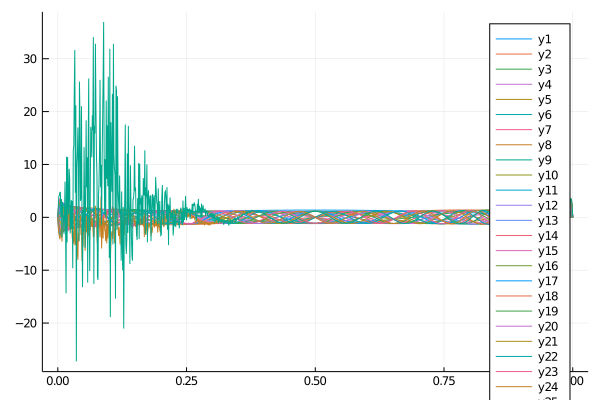

In [40]:
N = 24
V = [CreatePolynomial(n) for n in 0:N]

plot()
X = 0:0.001:1
for vi in V
    plot!(vi, X)
end
display(plot!())
